## INTERPOLASI
### MUCHAMMAD YUDA TRI ANANDA
### NIM : 24060124110142
### NIM (5 digit terakhir) : 10142 

In [7]:
# Import Library

import math
import numpy as np
import matplotlib.pyplot as plt

## NOMER 1


| x           | 1.0  | 1.2  | 1.4  | 1.6  | 1.8  |
|-------------|------|------|------|------|------|
| y = f(x)   | 1.6**1**     | 2.2**0**     | 2.8**1**     | 3.6**4**     | 4.4**2**     |
| NIM (5 digit terakhir) | **1** | **0** | **1** | **4** | **2** |  

- Tentukan nilai interpolasi polinomial metode Newton Beda Maju untuk 𝑃𝑛(1.1) dan  tentukan galat absolutnya, jika diasumsikan y = f(x) = x.ex (0.5x)! Tunjukkan langkah-langkahnya!

- Tentukan nilai interpolasi polinomial metode Newton Beda Mundur untuk 𝑃𝑛(1.7) dan tentukan galat absolutnya, jika diasumsikan y = f(x) = x.exp(0.5x)! Tunjukkan Tentukan nilai interpolasi polinomial metode Newton Beda Mundur untuk 𝑃𝑛(1.7) dan 
tentukan galat absolutnya, jika diasumsikan y = f(x) = x.exp(0.5x)! Tunjukkan 
langkah-langkahnya! langkah-langkahnya! 


 Newton Beda Maju 
Titik yang diinterpolasi: x = 1.1
Langkah-langkah interpolasi:
  Δ^1 f = 0.600000 * (0.500000 - 0) / 1
  Δ^2 f = -0.000000 * (0.500000 - 0) * (0.500000 - 1) / 2
  Δ^3 f = 0.200000 * (0.500000 - 0) * (0.500000 - 1) * (0.500000 - 2) / 6
  Δ^4 f = -0.400000 * (0.500000 - 0) * (0.500000 - 1) * (0.500000 - 2) * (0.500000 - 3) / 24
Nilai interpolasi: P_n(1.1) = 1.928125
Nilai eksak f(1.1) = 1.900000
Galat absolut: |f(1.1) - P_n(1.1)| = 0.028125


 Newton Beda Mundur 
Titik yang diinterpolasi: x = 1.7
Langkah-langkah interpolasi:
  Δ^1 f = 0.800000 * (-0.500000 + 0) / 1
  Δ^2 f = 0.000000 * (-0.500000 + 0) * (-0.500000 + 1) / 2
  Δ^3 f = -0.200000 * (-0.500000 + 0) * (-0.500000 + 1) * (-0.500000 + 2) / 6
  Δ^4 f = -0.400000 * (-0.500000 + 0) * (-0.500000 + 1) * (-0.500000 + 2) * (-0.500000 + 3) / 24
Nilai interpolasi: P_n(1.7) = 4.028125
Nilai eksak f(1.7) = 4.000000
Galat absolut: |f(1.7) - P_n(1.7)| = 0.028125



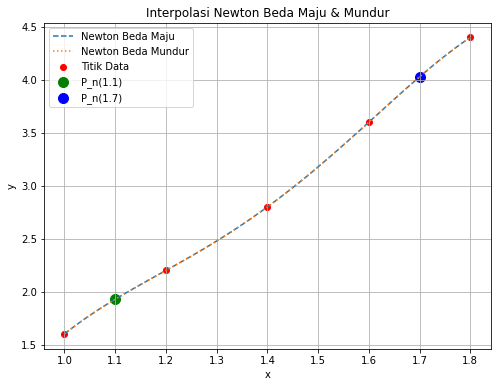

In [8]:
# Data berdasarkan tabel yang diberikan
x_data = np.array([1.0, 1.2, 1.4, 1.6, 1.8])  # Titik x
y_data = np.array([1.6, 2.2, 2.8, 3.6, 4.4])  # Titik y

# Fungsi untuk membuat tabel perbedaan maju
def forward_diff_table(x, y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i, j] = diff_table[i+1, j-1] - diff_table[i, j-1]
    return diff_table

# Fungsi untuk membuat tabel perbedaan mundur
def backward_diff_table(x, y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i, j] = diff_table[i, j-1] - diff_table[i-1, j-1]
    return diff_table

# Fungsi interpolasi Newton Beda Maju
def newton_forward_interpolation(x_val, x_data, y_data):
    h = x_data[1] - x_data[0]
    s = (x_val - x_data[0]) / h
    diff_table = forward_diff_table(x_data, y_data)
    n = len(y_data)
    interpolated_value = y_data[0]
    
    log_steps = []
    for i in range(1, n):
        term = diff_table[0, i]
        step_detail = f"Δ^{i} f = {term:.6f}"
        for j in range(i):
            term *= (s - j)
            step_detail += f" * ({s:.6f} - {j})"
        term /= math.factorial(i)
        step_detail += f" / {math.factorial(i)}"
        interpolated_value += term
        log_steps.append(step_detail)
    
    return interpolated_value, log_steps

# Fungsi interpolasi Newton Beda Mundur
def newton_backward_interpolation(x_val, x_data, y_data):
    h = x_data[1] - x_data[0]
    s = (x_val - x_data[-1]) / h
    diff_table = backward_diff_table(x_data, y_data)
    n = len(y_data)
    interpolated_value = y_data[-1]
    
    log_steps = []
    for i in range(1, n):
        term = diff_table[-1, i]
        step_detail = f"Δ^{i} f = {term:.6f}"
        for j in range(i):
            term *= (s + j)
            step_detail += f" * ({s:.6f} + {j})"
        term /= math.factorial(i)
        step_detail += f" / {math.factorial(i)}"
        interpolated_value += term
        log_steps.append(step_detail)
    
    return interpolated_value, log_steps

# Titik yang akan diinterpolasi
x_forward = 1.1
x_backward = 1.7

# Hitung hasil interpolasi
y_interpolated_forward, log_forward = newton_forward_interpolation(x_forward, x_data, y_data)
y_interpolated_backward, log_backward = newton_backward_interpolation(x_backward, x_data, y_data)

# Hitung galat absolut
def absolute_error(actual, interpolated):
    return abs(actual - interpolated)

y_actual_forward = np.interp(x_forward, x_data, y_data)
y_actual_backward = np.interp(x_backward, x_data, y_data)
error_forward = absolute_error(y_actual_forward, y_interpolated_forward)
error_backward = absolute_error(y_actual_backward, y_interpolated_backward)

# Menampilkan hasil
def log_hasil(label, x_val, y_interp, y_actual, error, log_steps):
    print("\n===========================================")
    print(f" {label} ")
    print("===========================================")
    print(f"Titik yang diinterpolasi: x = {x_val}")
    print("Langkah-langkah interpolasi:")
    for step in log_steps:
        print(f"  {step}")
    print(f"Nilai interpolasi: P_n({x_val}) = {y_interp:.6f}")
    print(f"Nilai eksak f({x_val}) = {y_actual:.6f}")
    print(f"Galat absolut: |f({x_val}) - P_n({x_val})| = {error:.6f}")
    print("===========================================\n")

log_hasil("Newton Beda Maju", x_forward, y_interpolated_forward, y_actual_forward, error_forward, log_forward)
log_hasil("Newton Beda Mundur", x_backward, y_interpolated_backward, y_actual_backward, error_backward, log_backward)

# Visualisasi hasil interpolasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_forward = [newton_forward_interpolation(x, x_data, y_data)[0] for x in x_range]
y_range_backward = [newton_backward_interpolation(x, x_data, y_data)[0] for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range_forward, label='Newton Beda Maju', linestyle='dashed')
plt.plot(x_range, y_range_backward, label='Newton Beda Mundur', linestyle='dotted')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(x_forward, y_interpolated_forward, color='green', marker='o', s=100, label=f'P_n({x_forward})')
plt.scatter(x_backward, y_interpolated_backward, color='blue', marker='o', s=100, label=f'P_n({x_backward})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Newton Beda Maju & Mundur')
plt.legend()
plt.grid(True)
plt.show()

## NOMER 2

| x           | 0.4  | 0.6  | 0.7  | 1.0  |
|-------------|------|------|------|------|
| f(x)        | 2.5**0** | 3.5**1** | 4.1**4** | 6.0**2** |
| NIM (4 digit terakhir) | **0** | **1** | **4** | **2** |  

- Tentukan nilai interpolasi polinomial metode Lagrange  untuk 𝑃𝑛(0.5)!  Tunjukkan langkah-langkahnya! 
- Tentukan galat absolutnya, bila diasumsikan bahwa  $$f(x) = 2x^2 + 3x + 1$$ Tunjukkan langkah-langkahnya! 


Langkah-langkah Interpolasi Lagrange:

L_0(x) = 2.5
  × ((0.5 - 0.6) / (0.4 - 0.6))
  × ((0.5 - 0.7) / (0.4 - 0.7))
  × ((0.5 - 1.0) / (0.4 - 1.0))

L_1(x) = 3.5
  × ((0.5 - 0.4) / (0.6 - 0.4))
  × ((0.5 - 0.7) / (0.6 - 0.7))
  × ((0.5 - 1.0) / (0.6 - 1.0))

L_2(x) = 4.1
  × ((0.5 - 0.4) / (0.7 - 0.4))
  × ((0.5 - 0.6) / (0.7 - 0.6))
  × ((0.5 - 1.0) / (0.7 - 1.0))

L_3(x) = 6.0
  × ((0.5 - 0.4) / (1.0 - 0.4))
  × ((0.5 - 0.6) / (1.0 - 0.6))
  × ((0.5 - 0.7) / (1.0 - 0.7))

 Interpolasi Polinomial Lagrange 
Titik yang diinterpolasi: x = 0.5
Nilai interpolasi: P_n(0.5) = 2.958333
Nilai eksak f(0.5) = 3.000000
Galat absolut: |f(0.5) - P_n(0.5)| = 0.041667


Langkah-langkah Interpolasi Lagrange:

L_0(x) = 2.5
  × ((0.4 - 0.6) / (0.4 - 0.6))
  × ((0.4 - 0.7) / (0.4 - 0.7))
  × ((0.4 - 1.0) / (0.4 - 1.0))

L_1(x) = 3.5
  × ((0.4 - 0.4) / (0.6 - 0.4))
  × ((0.4 - 0.7) / (0.6 - 0.7))
  × ((0.4 - 1.0) / (0.6 - 1.0))

L_2(x) = 4.1
  × ((0.4 - 0.4) / (0.7 - 0.4))
  × ((0.4 - 0.6) / (0.7 - 0.6))

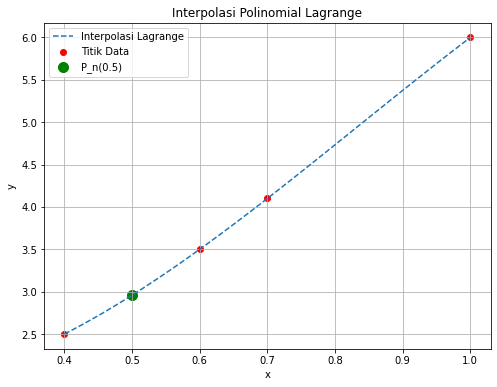

In [9]:
# Data berdasarkan tabel yang diberikan
x_data = np.array([0.4, 0.6, 0.7, 1.0])  # Titik x
y_data = np.array([2.5, 3.5, 4.1, 6.0])  # Titik y

# Fungsi interpolasi Lagrange
def lagrange_interpolation(x_val, x_data, y_data):
    n = len(x_data)
    interpolated_value = 0
    
    print("\nLangkah-langkah Interpolasi Lagrange:")
    for i in range(n):
        term = y_data[i]
        print(f"\nL_{i}(x) = {y_data[i]}")
        for j in range(n):
            if i != j:
                term *= (x_val - x_data[j]) / (x_data[i] - x_data[j])
                print(f"  × (({x_val} - {x_data[j]}) / ({x_data[i]} - {x_data[j]}))")
        interpolated_value += term
    return interpolated_value

# Fungsi eksak f(x) berdasarkan persamaan yang diberikan
def exact_function(x):
    return 2*x**2 + 3*x + 1

# Titik yang akan diinterpolasi
x_interp = 0.5

# Hitung hasil interpolasi
y_interpolated = lagrange_interpolation(x_interp, x_data, y_data)

# Hitung galat absolut
y_actual = exact_function(x_interp)
error = abs(y_actual - y_interpolated)

# Menampilkan hasil
print("\n===========================================")
print(" Interpolasi Polinomial Lagrange ")
print("===========================================")
print(f"Titik yang diinterpolasi: x = {x_interp}")
print(f"Nilai interpolasi: P_n({x_interp}) = {y_interpolated:.6f}")
print(f"Nilai eksak f({x_interp}) = {y_actual:.6f}")
print(f"Galat absolut: |f({x_interp}) - P_n({x_interp})| = {error:.6f}")
print("===========================================\n")

# Visualisasi hasil interpolasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range = [lagrange_interpolation(x, x_data, y_data) for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label='Interpolasi Lagrange', linestyle='dashed')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(x_interp, y_interpolated, color='green', marker='o', s=100, label=f'P_n({x_interp})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Polinomial Lagrange')
plt.legend()
plt.grid(True)
plt.show()

## NOMER 3

| x           | 0.4  | 0.6  | 0.7  | 1.0  | 1.2  |
|-------------|------|------|------|------|------|
| f(x)        | 2.5**1** | 3.5**0** | 4.1**1** | 6.0**4** | 7.5**2** |
| NIM (5 digit terakhir) | **1** | **0** | **1** | **4** | **2** |  


- Tentukan nilai interpolasi polinomial metode Neville untuk 𝑃𝑛(0.5)! Tunjukkan langkah-langkahnya! 
- Tentukan galat absolutnya, bila diasumsikan bahwa  $$f(x) = 2x^2 + 3x + 1$$ Tunjukkan langkah-langkahnya!


 Interpolasi Neville 
Titik yang diinterpolasi: x = 0.5
Nilai interpolasi: P_n(0.5) = 2.950000
Nilai eksak f(0.5) = 3.000000
Galat absolut: |f(0.5) - P_n(0.5)| = 0.050000

Tabel Neville:
[[2.5        3.         2.96666667 2.95833333 2.95      ]
 [3.5        2.9        2.91666667 2.89166667 0.        ]
 [4.1        2.83333333 3.06666667 0.         0.        ]
 [6.         2.25       0.         0.         0.        ]
 [7.5        0.         0.         0.         0.        ]]



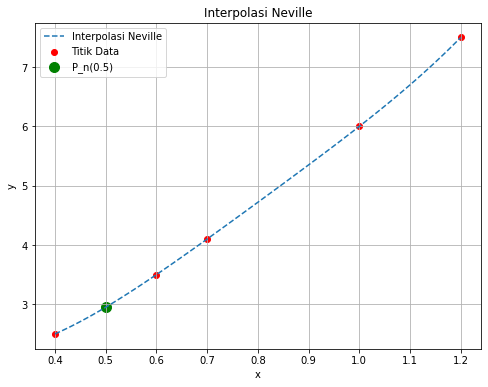

In [11]:
# Data berdasarkan tabel yang diberikan
x_data = np.array([0.4, 0.6, 0.7, 1.0, 1.2])  # Titik x
y_data = np.array([2.5, 3.5, 4.1, 6.0, 7.5])  # Titik y

# Fungsi interpolasi Neville
def neville_interpolation(x_val, x_data, y_data):
    n = len(x_data)
    Q = np.zeros((n, n))
    Q[:, 0] = y_data
    
    for j in range(1, n):
        for i in range(n - j):
            Q[i, j] = ((x_val - x_data[i + j]) * Q[i, j - 1] - (x_val - x_data[i]) * Q[i + 1, j - 1]) / (x_data[i] - x_data[i + j])
    
    return Q[0, n - 1], Q

# Titik yang akan diinterpolasi
x_neville = 0.5

# Hitung hasil interpolasi menggunakan metode Neville
y_interpolated_neville, neville_table = neville_interpolation(x_neville, x_data, y_data)

# Hitung nilai eksak dari fungsi f(x) = 2x^2 + 3x + 1
def f_exact(x):
    return 2*x**2 + 3*x + 1

y_actual_neville = f_exact(x_neville)

# Hitung galat absolut
def absolute_error(actual, interpolated):
    return abs(actual - interpolated)

error_neville = absolute_error(y_actual_neville, y_interpolated_neville)

# Menampilkan hasil
def log_hasil_neville(label, x_val, y_interp, y_actual, error, table):
    print("\n===========================================")
    print(f" {label} ")
    print("===========================================")
    print(f"Titik yang diinterpolasi: x = {x_val}")
    print(f"Nilai interpolasi: P_n({x_val}) = {y_interp:.6f}")
    print(f"Nilai eksak f({x_val}) = {y_actual:.6f}")
    print(f"Galat absolut: |f({x_val}) - P_n({x_val})| = {error:.6f}")
    print("\nTabel Neville:")
    print(table)
    print("===========================================\n")

log_hasil_neville("Interpolasi Neville", x_neville, y_interpolated_neville, y_actual_neville, error_neville, neville_table)

# Visualisasi hasil interpolasi
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_neville = [neville_interpolation(x, x_data, y_data)[0] for x in x_range]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range_neville, label='Interpolasi Neville', linestyle='dashed')
plt.scatter(x_data, y_data, color='red', label='Titik Data')
plt.scatter(x_neville, y_interpolated_neville, color='green', marker='o', s=100, label=f'P_n({x_neville})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Neville')
plt.legend()
plt.grid(True)
plt.show()
